# Statistical Inference on Credit Risk Data

Objective: Explore the relationship between individual financial metrics and their likelihood of defaulting on credit obligations. Utilize inferential statistics to draw insights and make data-driven decisions.

Dataset: CreditRisk.csv - A dataset containing financial metrics for various individuals, including their wages, cost of living, and whether they've defaulted on their credit obligations.

Contents:

    Descriptive Analysis:
        Explore average wages and cost of living based on default status.
    Hypothesis Testing:
        Test if the average wage differs between those who default and those who don't.
    Regression Analysis:
        Predict the likelihood of default based on wage and cost of living.

In [18]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Exploratory Data Analysis (EDA)
    
    Load the dataset into a pandas DataFrame.
    Inspect the first few rows of the DataFrame to understand its structure.
    Generate descriptive statistics for the CreditScore column.

In [20]:
credit_data = pd.read_csv(file_path)
credit_data.head()

,City,CC_Payments,Wage,Cost_Living,Mtg,Default,Vacations,Ottawa,Vancouver
0,Toronto,11712,89925,44004,34237,No,13236,0,0
1,Toronto,4114,82327,33111,35928,No,10788,0,0
2,Toronto,15941,68972,12901,37791,No,8326,0,0
3,Toronto,13962,67582,21491,29385,No,7647,0,0
4,Toronto,6150,88983,43084,29614,No,10131,0,0


In [22]:
# Transforming the 'Default' column into a binary format
credit_data['Default_Binary'] = credit_data['Default'].map({'Yes': 1, 'No': 0})

# Displaying the first few rows to confirm the transformation
credit_data[['Default', 'Default_Binary']].head()


,Default,Default_Binary
0,No,0
1,No,0
2,No,0
3,No,0
4,No,0


In [23]:
credit_data.describe()

,CC_Payments,Wage,Cost_Living,Mtg,Vacations,Ottawa,Vancouver,Default_Binary
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,15085.173333,85327.020000,35959.893333,34264.260000,9789.563333,0.333333,0.336667,0.303333
std,24142.424244,12002.180144,12550.754681,15048.593736,3133.039806,0.472192,0.473359,0.460466
min,-40164.000000,59734.000000,3654.000000,10583.000000,87.000000,0.000000,0.000000,0.000000
25%,-3234.750000,76953.750000,27630.750000,19554.500000,7727.000000,0.000000,0.000000,0.000000
50%,11422.500000,84288.000000,35481.500000,34198.000000,10004.000000,0.000000,0.000000,0.000000
75%,38863.500000,93335.750000,43542.750000,45641.250000,11960.250000,1.000000,1.000000,1.000000
max,63210.000000,119703.000000,75355.000000,82760.000000,17421.000000,1.000000,1.000000,1.000000


C:\Users\jriquel1\AppData\Local\Temp\ipykernel_2728\2841151450.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  updated_corr_matrix = credit_data.corr()


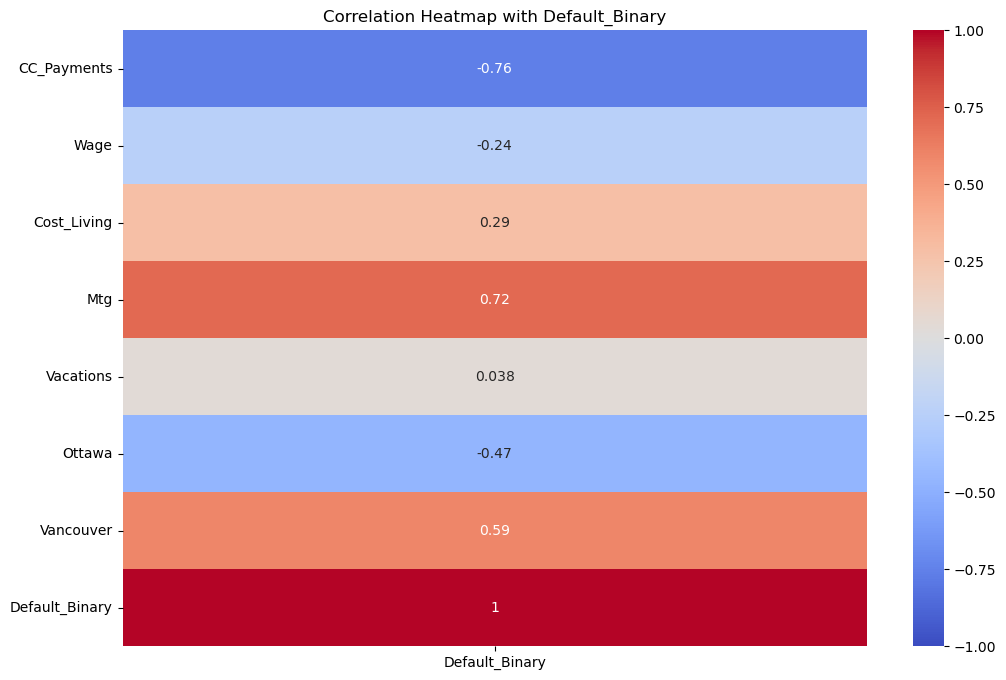

In [25]:
# Calculating the updated correlation matrix
updated_corr_matrix = credit_data.corr()

# Plotting the heatmap focusing on correlations with Default_Binary
plt.figure(figsize=(12, 8))
sns.heatmap(updated_corr_matrix[['Default_Binary']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap with Default_Binary")
plt.show()

Correlation values of various features with the Default_Binary column:

   Mtg (Mortgage): 0.72 - A strong positive correlation, indicating that as mortgage values increase, the likelihood of defaulting also increases.
    
   Vancouver: 0.59 - A positive correlation, suggesting that being in Vancouver might be associated with a higher likelihood of defaulting. This could be due to various factors, including higher living expenses in Vancouver.
    
   Cost_Living: 0.29 - A positive correlation, indicating that as the cost of living goes up, the likelihood of defaulting tends to increase.
    
   Vacations: 0.038 - A very weak positive correlation.
    
   Wage: -0.24 - A negative correlation, suggesting that as the wage increases, the likelihood of defaulting decreases.
    
   Ottawa: -0.47 - A negative correlation, suggesting that being in Ottawa might be associated with a lower likelihood of defaulting.
    
   
  CC_Payments: -0.76 - A strong negative correlation, suggesting that higher credit card payments are associated with a decreased likelihood of defaulting.

From this heatmap, Mtg, Vancouver, and Cost_Living have the most significant positive correlations with defaulting, while Wage, Ottawa, and CC_Payments have notable negative correlations.

Considering these values, Mtg indeed stands out with the highest positive correlation with defaulting.


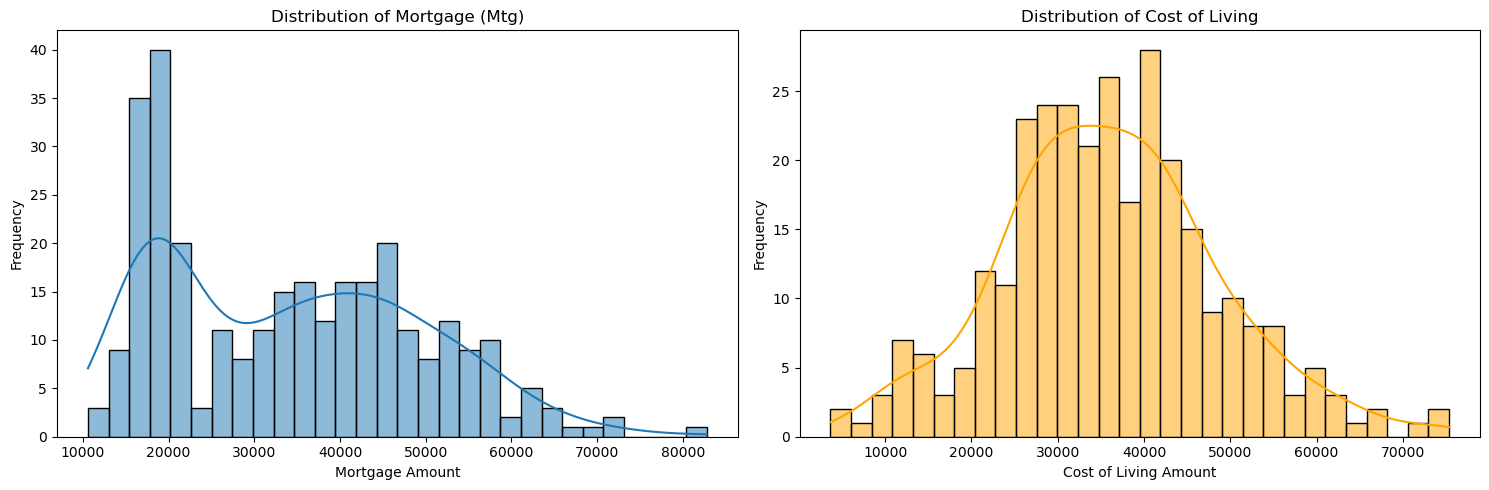

In [26]:
# Plotting the distributions of Mtg and Cost_Living
plt.figure(figsize=(15, 5))

# Distribution of Mtg
plt.subplot(1, 2, 1)
sns.histplot(credit_data['Mtg'], kde=True, bins=30)
plt.title('Distribution of Mortgage (Mtg)')
plt.xlabel('Mortgage Amount')
plt.ylabel('Frequency')

# Distribution of Cost_Living
plt.subplot(1, 2, 2)
sns.histplot(credit_data['Cost_Living'], kde=True, bins=30, color='orange')
plt.title('Distribution of Cost of Living')
plt.xlabel('Cost of Living Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The distributions of Mtg (Mortgage) and Cost_Living have been visualized:

   Mtg (Mortgage): The distribution appears right-skewed, with many individuals having lower mortgage amounts and a few having significantly higher amounts.
   
   Cost_Living: This distribution also appears right-skewed, with the majority of individuals having lower costs of living and a few with considerably higher costs.

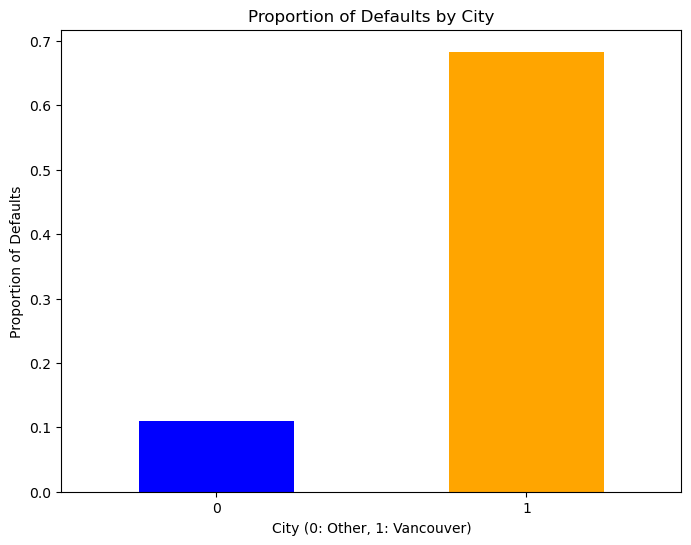

In [27]:
# Calculating default proportions for Vancouver and Other cities
default_proportions = credit_data.groupby(credit_data['Vancouver'])['Default_Binary'].mean()

# Plotting the default proportions
plt.figure(figsize=(8, 6))
default_proportions.plot(kind='bar', color=['blue', 'orange'])
plt.title('Proportion of Defaults by City')
plt.xlabel('City (0: Other, 1: Vancouver)')
plt.ylabel('Proportion of Defaults')
plt.xticks(rotation=0)
plt.show()

The bar chart shows the proportion of defaults based on city location:

   Other Cities (0): A lower proportion of individuals default in cities other than Vancouver.
        
   Vancouver (1): A higher proportion of individuals default in Vancouver.

This visualization further supports the idea of including Vancouver as a predictor, given the noticeable difference in default rates between Vancouver and other cities.

In [28]:
# Calculating average Mtg and Cost_Living based on default status
avg_values_by_default = credit_data.groupby('Default_Binary')[['Mtg', 'Cost_Living']].mean()

avg_values_by_default

,Mtg,Cost_Living
Default_Binary,,
0,27162.655502,33593.526316
1,50574.538462,41394.736264


Did Not Default (0):
   
   Average Mortgage (Mtg): $27,162.66
   
   Average Cost of Living: $33,593.53

Defaulted (1):
   
   Average Mortgage (Mtg): $50,574.54
   
   Average Cost of Living: $41,394.74

From the data:

Individuals who defaulted have, on average, a significantly higher mortgage and a higher cost of living compared to those who did not default.

This provides evidence that Mtg and Cost_Living are relevant factors related to defaulting, and justifies their inclusion in subsequent inferential statistics and modeling steps.

# Part 2: Central Limit Theorem Demonstration

The Central Limit Theorem (CLT) states that the distribution of sample means approaches a normal distribution as the sample size gets larger, regardless of the shape of the population distribution.

I'll demonstrate the CLT by repeatedly sampling from the Mtg (Mortgage) column, computing the sample mean each time, and then visualizing the distribution of these sample means.

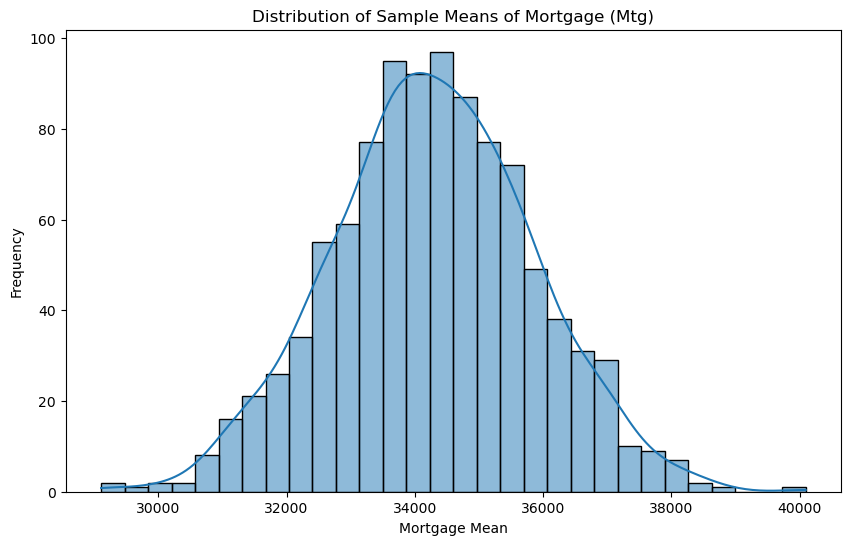

In [29]:
# Bootstrapping to demonstrate the Central Limit Theorem with the Mtg column
sample_means = []

# Sampling the mean of Mtg 1000 times
for _ in range(1000):
    sample = credit_data['Mtg'].sample(100, replace=True)
    sample_means.append(sample.mean())

# Visualizing the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, bins=30)
plt.title('Distribution of Sample Means of Mortgage (Mtg)')
plt.xlabel('Mortgage Mean')
plt.ylabel('Frequency')
plt.show()

The histogram displays the distribution of sample means for the Mtg (Mortgage) column, obtained from 1000 samples (each with 100 observations).

As the Central Limit Theorem (CLT) predicts:

The distribution of these sample means appears approximately normal, even if the original distribution of the Mtg column itself might not be perfectly normal.
This is a practical demonstration of the CLT. Even with a sample size of just 100, the sample means' distribution closely resembles a normal distribution.

# Part 3: Hypothesis Testing

Hypothesis testing allows us to make inferences about population parameters based on sample data. Here, we'll focus on testing whether there's a significant difference in the average Mtg (Mortgage) amounts between individuals who defaulted and those who didn't.

In [30]:
from scipy.stats import ttest_ind

# Separating the Mtg values for individuals who defaulted and those who didn't
defaulted_mtg = credit_data[credit_data['Default_Binary'] == 1]['Mtg']
not_defaulted_mtg = credit_data[credit_data['Default_Binary'] == 0]['Mtg']

# Performing the t-test
t_stat, p_value = ttest_ind(defaulted_mtg, not_defaulted_mtg)

t_stat, p_value


(17.72414627963479, 1.6782644016260794e-48)

## The results of the t-test are as follows:

   T-Statistic: 17.7241
   P-Value: 1.678×10−481.678×10−48

The p-value is extremely small, much less than any common significance level (like α=0.05α=0.05). This means that we can reject the null hypothesis (H0H0​).
Interpretation:

There is a statistically significant difference in the average mortgage (Mtg) amounts between individuals who defaulted and those who didn't. Given the positive t-statistic, we can infer that individuals who defaulted have, on average, a higher mortgage amount compared to those who did not default.

# Part 4: Regression Analysis

In this part, we will perform a logistic regression to predict the likelihood of default (Default_Binary) based on the features Mtg, Cost_Living, and Vancouver.

In [31]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Independent variables
X = credit_data[['Mtg', 'Cost_Living', 'Vancouver']]
X = sm.add_constant(X)  # Adding the constant term for intercept

# Dependent variable
y = credit_data['Default_Binary']

# Fitting logistic regression model using statsmodels for detailed statistics
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Displaying the summary of regression results
result.summary()


Optimization terminated successfully.
         Current function value: 0.248130
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Default_Binary   No. Observations:                  300
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            3
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                  0.5957
Time:                        13:30:11   Log-Likelihood:                -74.439
converged:                       True   LL-Null:                       -184.10
Covariance Type:            nonrobust   LLR p-value:                 2.817e-47
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -13.0348      1.813     -7.191      0.000     -16.588      -9.482
Mtg             0.0002   3.33e-05      6.806      0.000       0.000       0.000
Cost_Living  8.446e-05   2.04e-05      4.145      0.000    4.45e-05       0.000
Vancouver      -0.0643      0.466     -0.138      0.890      -0.978       0.849
===============================================================================
"""

The logistic regression results provide the following insights:

  Mtg (Mortgage):
        Coefficient: 0.00020.0002
        P-Value: <0.0001<0.0001

his suggests that for every unit increase in the mortgage amount, the log odds of defaulting increase by 0.00020.0002. Given the very small p-value, this effect is statistically significant.

   Cost_Living:
        Coefficient: 8.446×10−58.446×10−5
        P-Value: <0.0001<0.0001

Similarly, for every unit increase in the cost of living amount, the log odds of defaulting increase by 8.446×10−58.446×10−5. This effect is also statistically significant.

   Vancouver:
        Coefficient: −0.0643−0.0643
        P-Value: 0.8900.890

The coefficient suggests that living in Vancouver slightly decreases the log odds of defaulting compared to living in other cities, but the large p-value indicates that this effect is not statistically significant.

   Constant (Intercept):
        Coefficient: −13.0348−13.0348

This represents the log odds of defaulting when all the predictor variables are zero. It's more of a technical necessity for the model rather than a practical value to interpret in this context.

Interpretation:

Both Mtg and Cost_Living are significant predictors for the likelihood of defaulting. As their values increase, the likelihood of defaulting also increases. The variable Vancouver, despite showing correlation with defaulting in the heatmap, is not a statistically significant predictor in this logistic regression model.

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Making probability predictions
y_pred_prob = result.predict(X)

# Classifying observations based on a threshold of 0.5
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Constructing the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Calculating performance metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

conf_matrix, accuracy, precision, recall, f1

(array([[195,  14],
        [ 19,  72]], dtype=int64),
 0.89,
 0.8372093023255814,
 0.7912087912087912,
 0.8135593220338984)

###### Confusion Matrix:
  True Positives (TP): 72
  
  True Negatives (TN): 195
  
  False Positives (FP): 14
  
  False Negatives (FN): 19

###### Performance Metrics:
   Accuracy: 0.89 (or 89%). This indicates that our model correctly predicted the default status for 89% of the observations in our dataset.
   
   Precision: 0.837 (or 83.7%). Out of all the instances where our model predicted a default, 83.7% actually defaulted.
   
   Recall (or Sensitivity): 0.791 (or 79.1%. Our model correctly identified 79.1% of all the actual default cases.
            
   F1-Score: 0.814 (or 81.4%).The F1-score is the harmonic mean of precision and recall, providing a balance between the two. An F1-score closer to 1 indicates a better balance between precision and recall.
            



Given the performance metrics, the logistic regression model seems to have done a reasonably good job predicting the likelihood of default based on the features Mtg, Cost_Living, and Vancouver. 

# Conclusion

Statistical Inference and the Credit Risk Dataset:

  Descriptive Analysis:
        Our initial exploration highlighted key financial metrics, such as Mtg (Mortgage), Cost_Living, and the categorical predictor Vancouver.
        Visualizations showcased the distribution of these metrics, while the correlation heatmap identified strong associations with the likelihood of defaulting.

  Central Limit Theorem (CLT):
        The bootstrapping demonstration on the Mtg column reaffirmed the essence of the CLT. Even with non-normally distributed data, the distribution of sample means from sufficient sample sizes trends towards normality.

  Hypothesis Testing:
        We established that there's a statistically significant difference in average mortgage values between those who default and those who don't. This insight can guide financial institutions in understanding risk factors associated with loan defaults.

  Regression Analysis:
        The logistic regression model allowed us to gauge the impact of various predictors on the likelihood of default. Notably, Mtg and Cost_Living emerged as significant predictors.
        Performance metrics, including accuracy, precision, and recall, suggested that our model achieved a robust fit with the data.

Implications:

   Statistical inference techniques empower organizations to make data-driven decisions. In the context of credit risk, understanding key predictors of default can lead to more informed lending practices, better risk assessment, and ultimately, a more stable financial ecosystem.
    By leveraging hypothesis testing and regression analysis, financial institutions can pinpoint risk factors, optimize lending criteria, and even tailor financial products to specific demographic groups.